Blur Equalisation Technique
============================

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage as ndi
from time import clock

from camera_model import Camera
from depth_bet import depth_bet

Two images are taken with different.

In [2]:
fst_cam = Camera(focal_length = 50.0,
                 f_stop = 1.8,
                 pixel_pitch = 4.65e-3,
                 focus = 670) # Focalizarea este diferită.
snd_cam = Camera(focal_length = 50.0,
                 f_stop = 1.8,
                 pixel_pitch = 4.65e-3,
                 focus = 710) # Focalizarea este diferită.

Se generează o scenă sintetică.

(-0.5, 299.5, 299.5, -0.5)

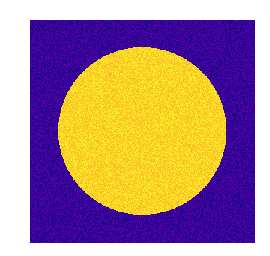

In [14]:
x = np.linspace(-1,1,300)
x, y = np.meshgrid(x,x)
I1 = np.where((x**2 + y**2) < 0.75**2  ,0.75,0.25)
I1 = I1 +  0.1 * np.random.rand(*I1.shape)

plt.matshow(I1)
plt.axis('off')

Generăm o scenă blurată.

In [15]:
diams = np.array([13,15,17,19]); # Diametri PSF  
dists = fst_cam.distance(diams*fst_cam.pitch);                 
dists

array([ 688.5812833 ,  691.53181108,  694.50773333,  697.50937931])

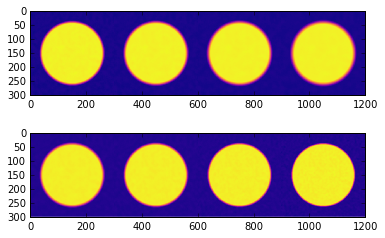

In [17]:

def gen_acq(the_cam):
    I = np.empty((I1.shape[0],I1.shape[1]*len(dists)))
    for i, d in enumerate(dists):
        V = ndi.convolve(I1,the_cam.psf(d))
        I[:,I1.shape[1]*i:I1.shape[1]*(i+1)] = V
    return I

fst_im = gen_acq(fst_cam);
snd_im = gen_acq(snd_cam);

plt.figure()
plt.subplot(2,1,1)
plt.imshow(fst_im)
plt.subplot(2,1,2)
plt.imshow(snd_im)


Aplicăm estimarea de adînicime.

In [18]:
fst_psfs = [fst_cam.psf(d) for d in dists]
snd_psfs = [snd_cam.psf(d) for d in dists]
est_time = -clock()
emap = depth_bet(fst_im, snd_im, fst_psfs, snd_psfs, 0)
est_time += clock()
print("Estimation time:", est_time)

Estimation time: 0.4326972886885301


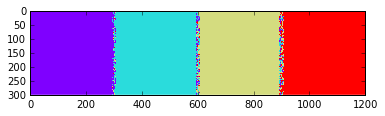

In [19]:
rdmap = np.argmin(emap,2)
plt.figure("Raw Depth Map")
plt.imshow(rdmap, cmap='rainbow')

Adăugăm zgomot.

In [20]:
fst_imz = fst_im + np.random.normal(0,1e-3,size=fst_im.shape)
snd_imz = snd_im + np.random.normal(0,1e-3,size=snd_im.shape)

In [21]:
est_time = -clock()
emapz = depth_bet(fst_imz, snd_imz, fst_psfs, snd_psfs, 0)
est_time += clock()
print("Estimation time:", est_time)

Estimation time: 0.43202626741100403


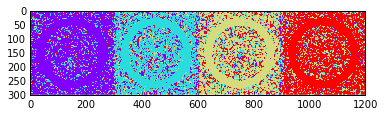

In [22]:
rdmapz = np.argmin(emapz,2)
plt.figure("Raw Depth Map")
plt.imshow(rdmapz, cmap='rainbow')

Imagini reale
=============

In [23]:
fst_cam = Camera(focal_length = 25.0,
                 f_stop = 8.3,
                 pixel_pitch = 0.025,
                 focus = 869) # Focalizarea este diferită.
snd_cam = Camera(focal_length = 25.0,
                 f_stop = 8.3,
                 pixel_pitch = 0.025,
                 focus = 529) # Focalizarea este diferită.

In [33]:
from imageio import imread
folder = "../data/"
fst_im = imread(folder + "breakfast_far.png")[:,:,1]/255
snd_im = imread(folder + "breakfast_near.png")[:,:,1]/255

OSError: No such file: 'C:\Users\DamianCristian\GitHubRepos\data\breakfast_far.png'

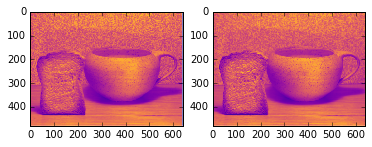

In [26]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(fst_im)
plt.subplot(1,2,2)
plt.imshow(snd_im)

In [31]:
dists =np.linspace(529, 869, 10)
fst_psfs = [fst_cam.psf(d) for d in dists]
snd_psfs = [snd_cam.psf(d) for d in dists]
est_time = -clock()
emap = depth_bet(fst_im, snd_im, fst_psfs, snd_psfs, 1)
est_time += clock()
print("Estimation time:", est_time)

Estimation time: 0.18859131310551902


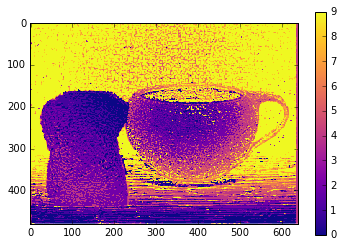

In [32]:
rdmap = np.argmin(emap,2)
plt.figure("Raw Depth Map")
plt.imshow(rdmap)
plt.colorbar()